In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
# knn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

c:\Users\Люциус\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filename = "Population estimates by gender nationality and region 2010 - 2022_data.csv"

df = pd.read_csv(filename)
df["Year"] = df["Year"].str.replace(",", '')
df["Population estimates"] = df["Population estimates"].str.replace(",", '')
df["Year"]=df["Year"].astype(int)
df["Population estimates"]=df["Population estimates"].astype(int)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int32 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 21.2+ KB
None


In [5]:
print(df.head())

           Region  Year  Gender Nationality  Population estimates
0         Madinah  2014  Female       Saudi                562344
1          Tabouk  2010  Female       Saudi                239792
2            Hail  2013  Female       Saudi                211727
3  Eastern Region  2016    Male       Saudi               1308467
4         Al-Baha  2018  Female   Non-Saudi                 16951


In [3]:
df["Region"] = LabelEncoder().fit_transform(df["Region"])
df["Nationality"] = LabelEncoder().fit_transform(df["Nationality"])
accuracies = []

Choose K = 3
kNN:
               precision    recall  f1-score   support

      Female       0.49      0.50      0.49        70
        Male       0.45      0.44      0.45        66

    accuracy                           0.47       136
   macro avg       0.47      0.47      0.47       136
weighted avg       0.47      0.47      0.47       136

        Female  Male
Female      35    35
Male        37    29


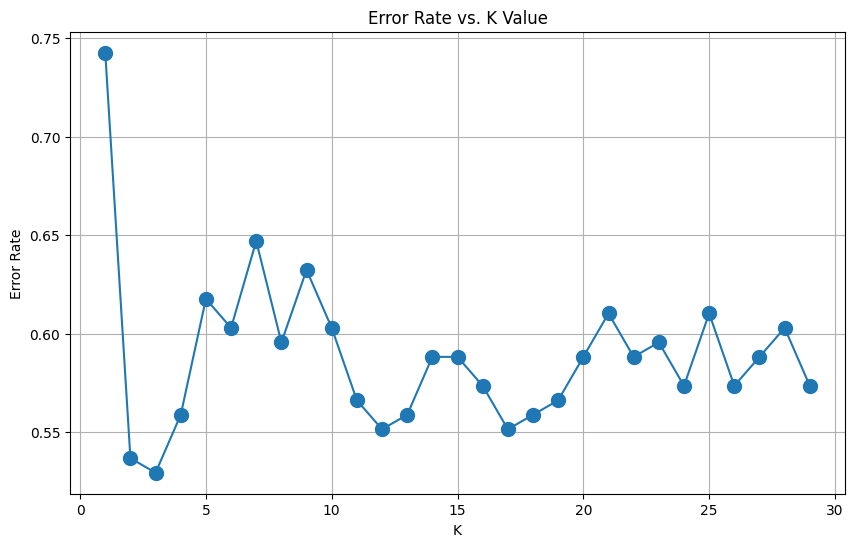

In [68]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
# y = LabelEncoder().fit_transform(df["Gender"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test)
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
k = error_rate.index(min(error_rate)) + 1
print("Choose K =", k)
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)
print("kNN:\n",classification_report(y_test, pred))
columns = y.unique()
cm = pd.DataFrame(data = confusion_matrix(y_test, pred), columns=columns, index=columns)
print(cm)
accuracies.append(("kNN", accuracy_score(y_test, pred)))

In [69]:
#Decision Tree
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x = x.iloc[:30]
y = y.iloc[:30]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Decision Tree:\n",classification_report(y_test, y_pred))
cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=columns, index=columns)
print(cm)
accuracies.append(("Decision Tree", accuracy_score(y_test, y_pred)))

Decision Tree:
               precision    recall  f1-score   support

      Female       0.80      0.80      0.80         5
        Male       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.40      0.40      0.40         6
weighted avg       0.67      0.67      0.67         6

        Female  Male
Female       4     1
Male         1     0


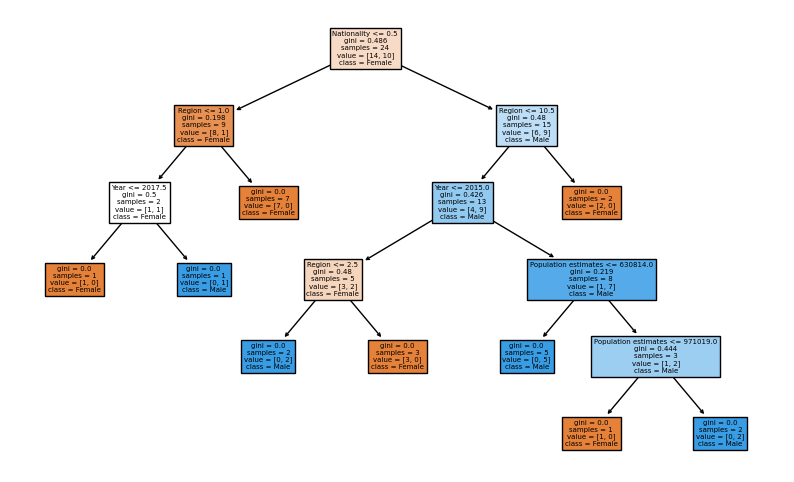

In [70]:
plt.figure(figsize = (10, 6))
plot_tree(model, feature_names = x.columns, 
    class_names = y.unique(), filled = True)
plt.show()

In [71]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train, y_train)
print("Best params of C and gamma:", grid.best_estimator_)
grid_predictions = grid.predict(scaled_X_test)
print("Support Vector Machine:\n", classification_report(y_test, grid_predictions))
cm = pd.DataFrame(data = confusion_matrix(y_test, grid_predictions), columns=columns, index=columns)
print(cm)
accuracies.append(("Support Vector Machine", accuracy_score(y_test, grid_predictions)))

Best params of C and gamma: SVC(C=1000, gamma=1)
Support Vector Machine:
               precision    recall  f1-score   support

      Female       0.67      0.63      0.65       102
        Male       0.64      0.68      0.66       101

    accuracy                           0.66       203
   macro avg       0.66      0.66      0.65       203
weighted avg       0.66      0.66      0.65       203

        Female  Male
Female      64    38
Male        32    69


In [46]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
print("Random Forest:\n", classification_report(y_test, y_pred))
columns = y.unique()
cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=columns, index=columns)
print(cm)
# print(confusion_matrix(y_test, y_pred))
accuracies.append(("Random Forest", accuracy_score(y_test, y_pred)))

Random Forest:
               precision    recall  f1-score   support

      Female       0.53      0.59      0.56        66
        Male       0.56      0.50      0.53        70

    accuracy                           0.54       136
   macro avg       0.55      0.55      0.54       136
weighted avg       0.55      0.54      0.54       136

        Female  Male
Female      39    27
Male        35    35
[[39 27]
 [35 35]]


In [72]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
y_pred = adaboost_classifier.predict(x_test)
print("Adaptive Boosting:\n", classification_report(y_test, y_pred))
cm = pd.DataFrame(data = confusion_matrix(y_test, y_pred), columns=columns, index=columns)
print(cm)
accuracies.append(("Adaptive Boosting", accuracy_score(y_test, y_pred)))

Adaptive Boosting:
               precision    recall  f1-score   support

      Female       0.84      0.57      0.68        80
        Male       0.58      0.84      0.69        56

    accuracy                           0.68       136
   macro avg       0.71      0.71      0.68       136
weighted avg       0.73      0.68      0.68       136

        Female  Male
Female      46    34
Male         9    47


In [73]:
print(accuracies)
accuracies = sorted(accuracies, key = lambda pair: pair[1], reverse = True)
print("Top classificator is", accuracies[0][0],"\nIt`s accuracy is:", accuracies[0][1])

[('kNN', 0.47058823529411764), ('Decision Tree', 0.6666666666666666), ('Support Vector Machine', 0.6551724137931034), ('Adaptive Boosting', 0.6838235294117647)]
Top classificator is Adaptive Boosting 
It`s accuracy is: 0.6838235294117647


In [5]:
df["Gender"] = LabelEncoder().fit_transform(df["Gender"])
df.head()

,Region,Year,Gender,Nationality,Population estimates
0,6,2014,0,1,562344
1,12,2010,0,1,239792
2,4,2013,0,1,211727
3,3,2016,1,1,1308467
4,0,2018,0,0,16951


In [91]:

x = df.drop(['Gender'], axis = 1)
y = df['Gender']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
num_classes = len(y.unique())
print(num_classes)
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test)

2


In [8]:
x = df.drop(['Region'], axis = 1)
y = df['Region']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
num_classes = len(y.unique())
print(num_classes)
scaler = MinMaxScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test)

13


In [119]:
model = keras.Sequential([layers.Dense(12, activation='relu', input_shape=(4,)),
                        keras.layers.Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(scaled_X_train,
                    y_train,
                    epochs=12,
                    batch_size=64,
                    validation_split=0.2, 
                    verbose = 2)

Epoch 1/12
7/7 - 1s - loss: 0.7208 - accuracy: 0.5255 - val_loss: 0.7097 - val_accuracy: 0.5000 - 616ms/epoch - 88ms/step
Epoch 2/12
7/7 - 0s - loss: 0.7155 - accuracy: 0.5255 - val_loss: 0.7042 - val_accuracy: 0.5093 - 42ms/epoch - 6ms/step
Epoch 3/12
7/7 - 0s - loss: 0.7110 - accuracy: 0.5255 - val_loss: 0.6998 - val_accuracy: 0.5185 - 42ms/epoch - 6ms/step
Epoch 4/12
7/7 - 0s - loss: 0.7071 - accuracy: 0.5301 - val_loss: 0.6963 - val_accuracy: 0.5370 - 41ms/epoch - 6ms/step
Epoch 5/12
7/7 - 0s - loss: 0.7047 - accuracy: 0.5301 - val_loss: 0.6931 - val_accuracy: 0.5463 - 41ms/epoch - 6ms/step
Epoch 6/12
7/7 - 0s - loss: 0.7020 - accuracy: 0.5463 - val_loss: 0.6906 - val_accuracy: 0.5556 - 40ms/epoch - 6ms/step
Epoch 7/12
7/7 - 0s - loss: 0.6994 - accuracy: 0.5509 - val_loss: 0.6889 - val_accuracy: 0.5741 - 42ms/epoch - 6ms/step
Epoch 8/12
7/7 - 0s - loss: 0.6976 - accuracy: 0.5625 - val_loss: 0.6874 - val_accuracy: 0.5926 - 39ms/epoch - 6ms/step
Epoch 9/12
7/7 - 0s - loss: 0.6960 - a

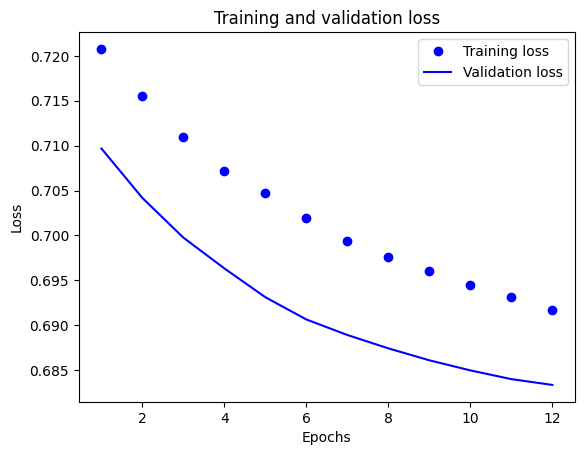

In [120]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [126]:
score = model.evaluate(scaled_X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.7059645056724548
Test accuracy: 0.5


In [2]:
import os
from PIL import Image
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [63]:
data_dir = 'animal_dataset_intermediate\\train'
image_paths = []
classes = []
class_names = os.listdir(data_dir)
for class_name in class_names[:3]:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image_paths.append(image_path)
        classes.append(class_name)

In [64]:
print(len(image_paths), len(classes))

4882 4882


In [65]:
def open_images(image_paths, classes):
    images = np.empty((len(image_paths), 200, 200, 3), dtype=np.ndarray)
    del_indexes = []
    for i, image_path in enumerate(image_paths):
        image = Image.open(image_path)
        resized_image = image.resize((200, 200))
        image.close()
        array_image = np.asarray(resized_image)
        if array_image.shape[2] != 3:
            del_indexes.append(i)
            continue
        images[i] = array_image
    del_indexes.sort(reverse=True)
    for index in del_indexes:
        del classes[index]
    mask = ~np.all(images == None, axis = (1, 2, 3))  # знаходимо елементи, які не є NaN
    images = images[mask]
    return images

In [66]:
images = open_images(image_paths, classes)

In [67]:
print(images.shape, len(classes))

(4849, 200, 200, 3) 4849


In [76]:
x = images.astype('float32') / 255
y = LabelEncoder().fit_transform(classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [77]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('image shape', x_train.shape)
# print((x_train[0][0]).tolist())

3879 train samples
970 test samples
image shape (3879, 200, 200, 3)


In [80]:
num_classes = 3
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

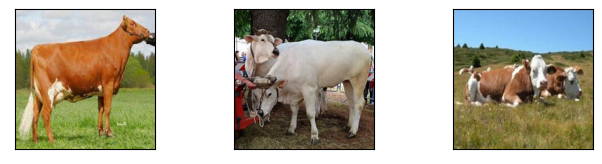

In [81]:
n = 3  
plt.figure(figsize=(8, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [82]:
model =  keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

In [83]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 flatten (Flatten)           (None, 614656)            0         
                                                                 
 dense (Dense)               (None, 128)               78676096  
                                                       

In [84]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12


31/31 [==============================] - 135s 4s/step - loss: 4.3783 - accuracy: 0.4390 - val_loss: 0.8898 - val_accuracy: 0.4979
Epoch 2/12
31/31 [==============================] - 116s 4s/step - loss: 0.7267 - accuracy: 0.6811 - val_loss: 0.5849 - val_accuracy: 0.7763
Epoch 3/12
31/31 [==============================] - 117s 4s/step - loss: 0.4958 - accuracy: 0.8059 - val_loss: 0.5242 - val_accuracy: 0.7876
Epoch 4/12
31/31 [==============================] - 117s 4s/step - loss: 0.3264 - accuracy: 0.8796 - val_loss: 0.4904 - val_accuracy: 0.8041
Epoch 5/12
31/31 [==============================] - 115s 4s/step - loss: 0.2017 - accuracy: 0.9345 - val_loss: 0.4794 - val_accuracy: 0.8093
Epoch 6/12
31/31 [==============================] - 111s 4s/step - loss: 0.1179 - accuracy: 0.9629 - val_loss: 0.5233 - val_accuracy: 0.8237
Epoch 7/12
31/31 [==============================] - 114s 4s/step - loss: 0.0801 - accuracy: 0.9773 - val_loss: 0.5651 - val_accuracy: 0.8186
Epoch 8/12


In [85]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.7129656076431274
Test accuracy: 0.839175283908844


In [86]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [358]:
data = pd.read_json("data.json", lines=True, encoding = "latin-1")
data = data[["rented for", "review_text"]]

In [359]:
data = data[:50000]
data.shape

(50000, 2)

In [360]:
unique = data["rented for"].unique()
classes = ['vacation', 'other', 'date', 'work']
data = data[data["rented for"].isin(classes)]
new_unique = data["rented for"].unique()

In [361]:
stop_words = stopwords.words('english')
stop_words.append("dress")
stop_words.append("fit")
stop_words.append("look")
stop_words.append("comfort")
stop_words.append("perfect")
stop_words.append("color")
stop_words.append("top")
stop_words.append("wore")

In [362]:
def text_cleaner(text):
    text = text.lower()
    text = re.sub("\d", "", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), "", text)
    text = re.sub('\n', "", text)
    text = re.sub('\s{2,}',"", text)
    text_tokens = word_tokenize(text)
    filtered_text = []
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)
    stemmer = PorterStemmer()
    text = [stemmer.stem(t) for t in filtered_text]
    return text

In [363]:
print(data.head())
data["review_text"] = data["review_text"].apply(text_cleaner)
print(data.head())

   rented for                                        review_text
0    vacation  An adorable romper! Belt and zipper were a lit...
1       other  I rented this dress for a photo shoot. The the...
5        date  Didn't actually wear it. It fit perfectly. The...
16   vacation  This dress is just darling. I would absolutely...
21      other  I wore this dress to my daughter's baptism. It...
   rented for                                        review_text
0    vacation  [ador, romper, belt, zipper, littl, hard, navi...
1       other  [rent, photo, shoot, theme, hollywood, glam, b...
5        date  [didnt, actual, wear, perfectli, fabric, littl...
16   vacation  [darl, would, absolut, wear, fit, true, size, ...
21      other  [daughter, baptism, formal, daytim, affair, fe...


In [364]:
data["rented for"].unique()

array(['vacation', 'other', 'date', 'work'], dtype=object)

In [366]:
x = data.drop(['rented for'], axis = 1)
y = LabelEncoder().fit_transform(data['rented for'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)

In [367]:
print(y_train)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


In [234]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [368]:
x_train["review_text"]

31220    [lace, detail, beauti, bodic, perfectli, arm, ...
12973    [pro, wide, leg, great, women, curvi, balanc, ...
4178     [wear, anyth, chic, comfort, fashion, love, le...
10480    [absolut, wonder, waist, fit, fabric, catch, e...
4219     [beauti, instantli, fell, love, great, issu, f...
                               ...                        
1150     [love, black, oliv, combin, shape, detail, gav...
37874    [love, pink, great, work, well, dinner, drink,...
44469    [pro, length, work, skirt, qualiti, materi, li...
32600                                                   []
48801    [rent, valentin, dinnerit, ran, littl, tight, ...
Name: review_text, Length: 8680, dtype: object

In [369]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train["review_text"])
sequences = tokenizer.texts_to_sequences(x_train["review_text"])

In [370]:
word_index = tokenizer.word_index
num_unique_words = len(word_index)

In [382]:
maxlen = 500
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [383]:
# tokenizer2 = Tokenizer()
# tokenizer2.fit_on_texts(x_test["review_text"])
sequences2 = tokenizer.texts_to_sequences(x_test["review_text"])
padded_sequences2 = pad_sequences(sequences2, maxlen=maxlen, padding='post')


In [385]:
print(len(padded_sequences2),len(padded_sequences))

2171 8680


In [384]:
model =  keras.Sequential([keras.Input(shape=(None,), dtype="int64"),
                          layers.Embedding(num_unique_words+1, output_dim=128),
                          
                          layers.Conv1D(64, 3, activation = 'relu'),
                          layers.GlobalMaxPooling1D(),
                        #   layers.LSTM(128),
                          layers.Dropout(0.5),
                          layers.Dense(4, activation='softmax')])


In [386]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(padded_sequences,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose = 1)

Epoch 1/10
55/55 [==============================] - 5s 74ms/step - loss: 1.2885 - accuracy: 0.3917 - val_loss: 1.2222 - val_accuracy: 0.5259
Epoch 2/10
55/55 [==============================] - 4s 71ms/step - loss: 1.1711 - accuracy: 0.5108 - val_loss: 1.1036 - val_accuracy: 0.5444
Epoch 3/10
55/55 [==============================] - 4s 74ms/step - loss: 1.0275 - accuracy: 0.6027 - val_loss: 1.0035 - val_accuracy: 0.5939
Epoch 4/10
55/55 [==============================] - 4s 71ms/step - loss: 0.8936 - accuracy: 0.6620 - val_loss: 0.9691 - val_accuracy: 0.6031
Epoch 5/10
55/55 [==============================] - 4s 73ms/step - loss: 0.7897 - accuracy: 0.7133 - val_loss: 0.9520 - val_accuracy: 0.6187
Epoch 6/10
55/55 [==============================] - 4s 75ms/step - loss: 0.6740 - accuracy: 0.7630 - val_loss: 0.9593 - val_accuracy: 0.6158
Epoch 7/10
55/55 [==============================] - 4s 75ms/step - loss: 0.5767 - accuracy: 0.8044 - val_loss: 0.9903 - val_accuracy: 0.6123
Epoch 8/10
55

In [387]:
score = model.evaluate(padded_sequences2, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.1719446182250977
Test accuracy: 0.5656379461288452
